### Create Random Distribution of Points

In [9]:
import numpy as np
import random 
import math
import csv

image_width = 4000
image_height = 3000
num_lines = 111


def generate_point():
    return random.randint(0, image_width), random.randint(0, image_height)

def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

def create_random_distribution(median, range_min, range_max, size):
    # Calculate the standard deviation based on the desired range
    range_mean = (range_max + range_min) / 2
    std_dev = (range_max - range_min) / 4

    # Generate the random distribution using numpy
    distribution = np.random.normal(loc=median, scale=std_dev, size=size)

    return distribution

distance = create_random_distribution(400,30,1000,126)
distance = distance[distance>10]


def generate_csv(filename):
    with open(filename, 'w', newline='') as file:
        writer = csv.writer(file)
        
        for _ in range(num_lines):
            source = generate_point()
            
            # Adjust the destination point to achieve the desired mean distance
            angle = np.random.rand() *  np.pi/2
            destination = int(source[0] + distance[_] * round(math.cos(angle))), int(source[1]+ distance[_]  * round(math.sin(angle)))
            
            writer.writerow([source[0], source[1], destination[0], destination[1]])

# Usage example
generate_csv('./data/evaluation/random.csv')

In [91]:
import numpy as np
import random 
import math

image_width = 4000
image_height = 3000
num_lines = 10

def generate_point():
    return random.randint(0, image_width), random.randint(0, image_height)

def calculate_distance(point1, point2):
    x1, y1 = point1
    x2, y2 = point2
    return ((x2 - x1) ** 2 + (y2 - y1) ** 2) ** 0.5

def create_random_distribution(median, range_min, range_max, size):
    # Calculate the standard deviation based on the desired range
    range_mean = (range_max + range_min) / 2
    std_dev = (range_max - range_min) / 4

    # Generate the random distribution using numpy
    distribution = np.random.normal(loc=median, scale=std_dev, size=size)

    return distribution

distance = create_random_distribution(200,30,500,156)
distance = distance[distance>10]


def generate_csv(source_filename, destination_filename):
    with open(source_filename, 'w', newline='') as source_file, open(destination_filename, 'w', newline='') as destination_file:
        source_writer = csv.writer(source_file)
        destination_writer = csv.writer(destination_file)
        
        for _ in range(num_lines):
            source = generate_point()
            
            # Adjust the destination point to achieve the desired mean distance
            angle = np.random.rand() * np.pi/2
            destination = int(source[0] + distance[_] * round(math.cos(angle))), int(source[1] + distance[_] * round(math.sin(angle)))
            
            source_writer.writerow([source[0], source[1]])
            destination_writer.writerow([destination[0], destination[1]])


# Usage example
generate_csv('./data/evaluation/random_src.csv','./data/evaluation/random_dst.csv')

### ANOMALY DETECTION

In [13]:
import warnings
import numpy as np
import pandas as pd
from pyod.models.mad import MAD
from pyod.models.knn import KNN
from pyod.models.lof import LOF
import matplotlib.pyplot as plt
from sklearn.ensemble import IsolationForest

pd.set_option('max.rows', 250)
warnings.filterwarnings('ignore')

In [20]:
data_values = [['2021-05-1', 45000.0],
       ['2021-05-2', 70000.0],
       ['2021-05-3', 250000.0],
       ['2021-05-4', 70000.0],
       ['2021-05-5', 45000.0],
       ['2021-05-6', 55000.0],
       ['2021-05-7', 35000.0],
       ['2021-05-8', 60000.0],
       ['2021-05-9', 45000.0],
       ['2021-05-10', 25000.0],
       ['2021-05-11', 142936.0],
       ['2021-05-12', 138026.0],
       ['2021-05-13', 28347.0],
       ['2021-05-14', 40962.66],
       ['2021-05-15', 34543.0],
       ['2021-05-16', 40962.66],
       ['2021-05-17', 25207.0],
       ['2021-05-18', 37502.0],
       ['2021-05-19', 29589.0],
       ['2021-05-20', 78404.0],
       ['2021-05-21', 26593.0],
       ['2021-05-22', 123267.0],
       ['2021-05-23', 46880.0],
       ['2021-05-24', 65361.0],
       ['2021-05-25', 46042.0],
       ['2021-05-26', 48209.0],
       ['2021-05-27', 44461.0],
       ['2021-05-28', 90866.0],
       ['2021-05-29', 46886.0],
       ['2021-05-30', 33456.0],
       ['2021-05-31', 46251.0],
       ['2021-06-1', 29370.0],
       ['2021-06-2', 165620.0],
       ['2021-06-3', 20317.0]]
       
data = pd.DataFrame(data_values , columns=['date', 'amount'])
data.head()

,date,amount
0,2021-05-1,45000.0
1,2021-05-2,70000.0
2,2021-05-3,250000.0
3,2021-05-4,70000.0
4,2021-05-5,45000.0


In [15]:
def fit_model(model, data, column='amount'):
    
    df = data.copy()
    data_to_predict = data[column].to_numpy().reshape(-1, 1)
    predictions = model.fit_predict(data_to_predict)
    df['Predictions'] = predictions
    
    return df

def plot_anomalies(df, x='date', y='amount'):

    # categories will be having values from 0 to n
    # for each values in 0 to n it is mapped in colormap
    categories = df['Predictions'].to_numpy()
    colormap = np.array(['g', 'r'])

    f = plt.figure(figsize=(12, 4))
    f = plt.scatter(df[x], df[y], c=colormap[categories])
    f = plt.xlabel(x)
    f = plt.ylabel(y)
    f = plt.xticks(rotation=90)
    plt.show()

***INTER QUARTILE RANGE***

In [18]:
def find_anomalies(value, lower_threshold, upper_threshold):
    
    if value < lower_threshold or value > upper_threshold:
        return 1
    else: return 0

def iqr_anomaly_detector(data, column='amount', threshold=1.1):
    
    df = data.copy()
    quartiles = dict(data[column].quantile([.25, .50, .75]))
    quartile_3, quartile_1 = quartiles[0.75], quartiles[0.25]
    iqr = quartile_3 - quartile_1

    lower_threshold = quartile_1 - (threshold * iqr)
    upper_threshold = quartile_3 + (threshold * iqr)

    print(f"Lower threshold: {lower_threshold}, \nUpper threshold: {upper_threshold}\n")
    
    df['Predictions'] = data[column].apply(find_anomalies, args=(lower_threshold, upper_threshold))
    return df

Lower threshold: -2944.050000000003, 
Upper threshold: 106441.55



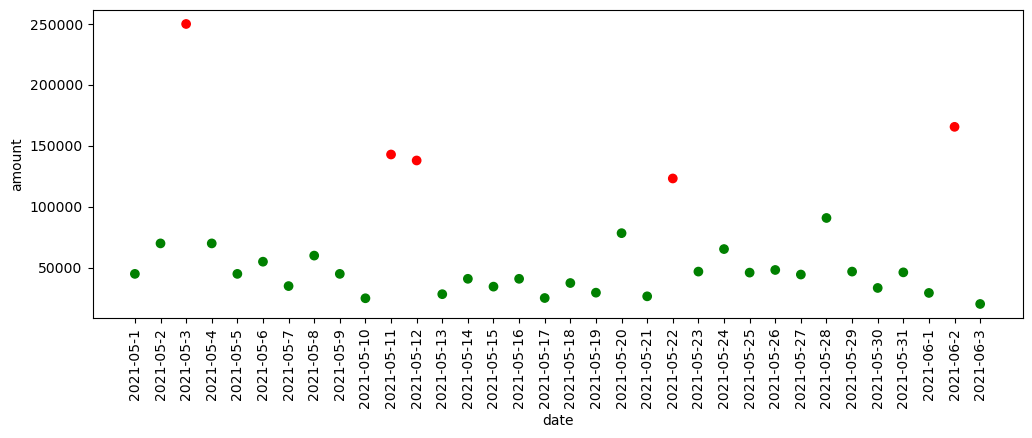

In [19]:
iqr_df = iqr_anomaly_detector(data)
plot_anomalies(iqr_df)

***ISOLATION FOREST***

In [21]:
def scale_anomaly_scores(s):
    """Changing (-0.5, 0.5) to (0, 1)"""
    a, b = (-0.5, 0.5), (1, 0)
    (a1, a2), (b1, b2) = a, b
    return (b1 + ((s - a1) * (b2 - b1) / (a2 - a1))) * 100

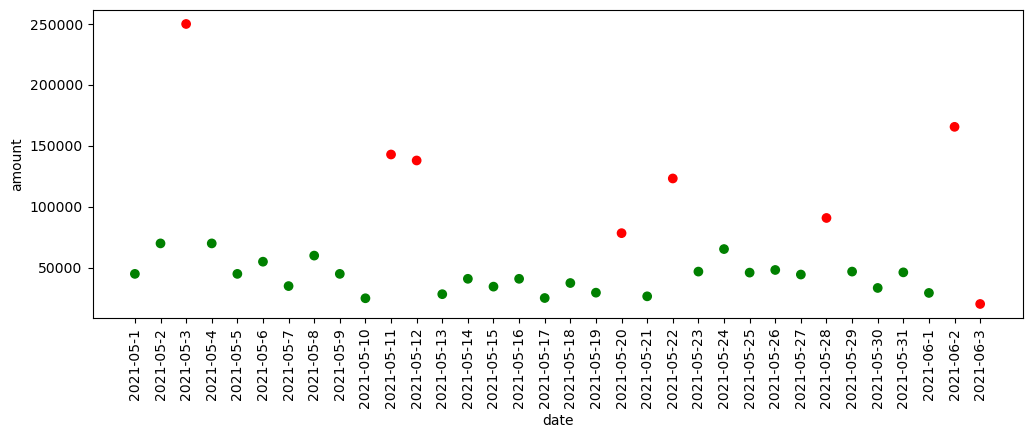

In [22]:
iso_forest = IsolationForest(n_estimators=125)
iso_df = fit_model(iso_forest, data)
iso_df['Predictions'] = iso_df['Predictions'].map(lambda x: 1 if x==-1 else 0)
plot_anomalies(iso_df)

In [23]:
iso_df.head()

,date,amount,Predictions
0,2021-05-1,45000.0,0
1,2021-05-2,70000.0,0
2,2021-05-3,250000.0,1
3,2021-05-4,70000.0,0
4,2021-05-5,45000.0,0


In [24]:
univariate_data = data['amount'].to_numpy().reshape(-1, 1)
# These values range from -0.5 to 0.5
anomaly_scores = iso_forest.decision_function(univariate_data)
anomaly_scores

array([ 0.14080388,  0.04646196, -0.30627641,  0.04646196,  0.14080388,
        0.04458633,  0.0796161 ,  0.03706511,  0.14080388,  0.0254254 ,
       -0.07534856, -0.06472874,  0.05916003,  0.09979432,  0.08385036,
        0.09979432,  0.03242196,  0.06547768,  0.07472716, -0.02502379,
        0.03625943, -0.10035319,  0.13807934,  0.03368048,  0.13770071,
        0.08664247,  0.12280786, -0.07773978,  0.13807934,  0.06774903,
        0.1378711 ,  0.07624434, -0.16714598, -0.12188256])

In [25]:
iso_df['Anomaly Scores'] = anomaly_scores
iso_df.head()

,date,amount,Predictions,Anomaly Scores
0,2021-05-1,45000.0,0,0.140804
1,2021-05-2,70000.0,0,0.046462
2,2021-05-3,250000.0,1,-0.306276
3,2021-05-4,70000.0,0,0.046462
4,2021-05-5,45000.0,0,0.140804


In [26]:
# Scale it between 1 and 100
scaled_scores = pd.Series(anomaly_scores).map(scale_anomaly_scores).to_numpy()

In [27]:
iso_df['Scaled Scores'] = scaled_scores
iso_df.head()

,date,amount,Predictions,Anomaly Scores,Scaled Scores
0,2021-05-1,45000.0,0,0.140804,35.919612
1,2021-05-2,70000.0,0,0.046462,45.353804
2,2021-05-3,250000.0,1,-0.306276,80.627641
3,2021-05-4,70000.0,0,0.046462,45.353804
4,2021-05-5,45000.0,0,0.140804,35.919612


***MAD Model***

In [28]:
def get_anomaly_scores(model):
  anomaly_scores = model.decision_scores_
  threshold = model.threshold_
  return anomaly_scores, threshold

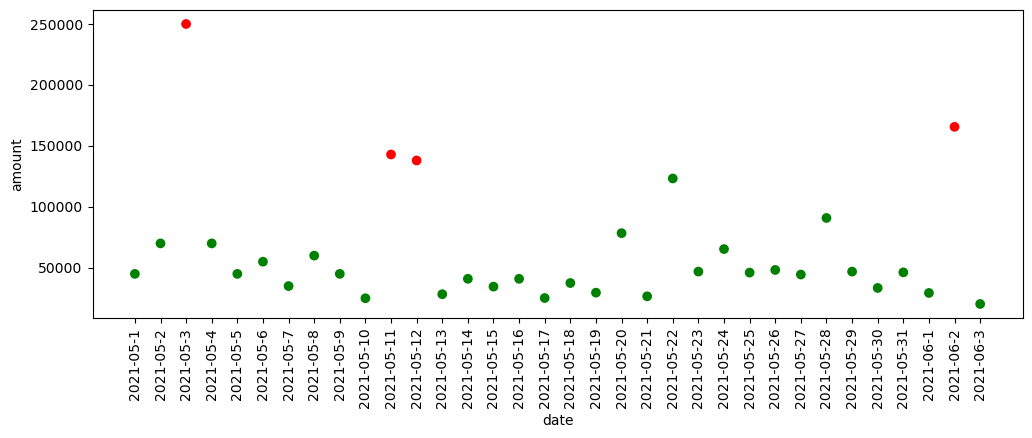

In [29]:
"""Median Absolute Deviation"""
mad_model = MAD()
mad_df = fit_model(mad_model, data)
plot_anomalies(mad_df)

In [30]:
anomaly_scores, threshold = get_anomaly_scores(mad_model)
print(f"Anomaly Scores: {anomaly_scores}, \nThreshold: {threshold}")

Anomaly Scores: [0.02311101 1.08586271 9.07047355 1.08586271 0.02311101 0.42047848
 0.4667005  0.64227322 0.02311101 0.91028999 4.32122702 4.10342458
 0.76182059 0.20220317 0.48697254 0.20220317 0.90110769 0.35571441
 0.70672678 1.45865532 0.83962619 3.44873085 0.06028381 0.88008155
 0.02311101 0.11923686 0.04702049 2.01145655 0.06054997 0.53519072
 0.03238203 0.71644139 5.32746542 1.11802295], 
Threshold: 3.5


In [31]:
mad_df['Anomaly Scores'] = anomaly_scores
mad_df.head()

,date,amount,Predictions,Anomaly Scores
0,2021-05-1,45000.0,0,0.023111
1,2021-05-2,70000.0,0,1.085863
2,2021-05-3,250000.0,1,9.070474
3,2021-05-4,70000.0,0,1.085863
4,2021-05-5,45000.0,0,0.023111


***KNN MODEL***

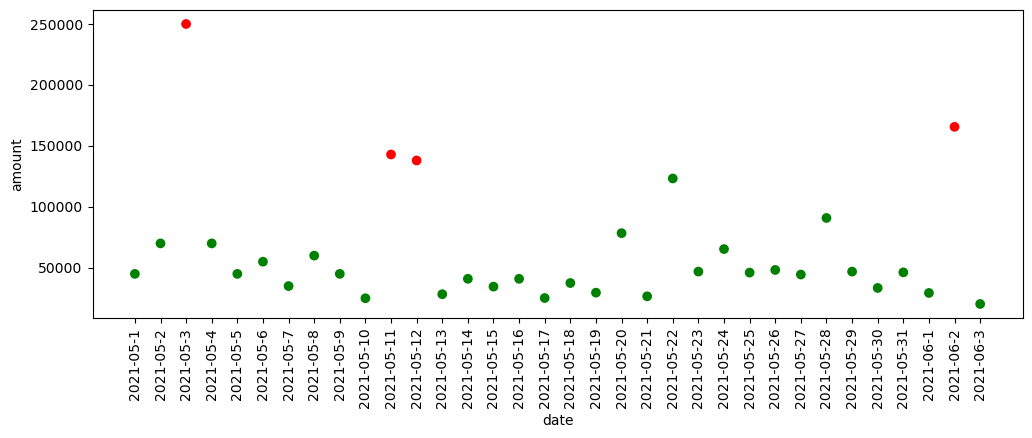

In [32]:
"""KNN Based Outlier Detection"""
knn_model = KNN()
knn_df = fit_model(knn_model, data)
plot_anomalies(knn_df)

In [33]:
anomaly_scores, threshold = get_anomaly_scores(knn_model)
print(f"Anomaly Scores: {anomaly_scores}, \nThreshold: {threshold}")

Anomaly Scores: [  1251.    15000.   159134.    15000.     1251.     8749.     5630.
  11791.     1251.     4589.    64532.    59622.     3347.     4037.34
   5173.     4037.34   4382.     4046.     4382.    18404.     2996.
  44863.     1880.    13043.     1042.     3209.     1790.    30866.
   1886.     4086.     1251.     4163.    84380.     9053.  ], 
Threshold: 55194.29999999999


In [34]:
knn_df['Anomaly Scores'] = anomaly_scores
knn_df.head()

,date,amount,Predictions,Anomaly Scores
0,2021-05-1,45000.0,0,1251.0
1,2021-05-2,70000.0,0,15000.0
2,2021-05-3,250000.0,1,159134.0
3,2021-05-4,70000.0,0,15000.0
4,2021-05-5,45000.0,0,1251.0


In [35]:
# Threshold computation
pd.Series(anomaly_scores).quantile(.90)

55194.29999999999

***LOCAL OUTLIER FACTOR MODEL***

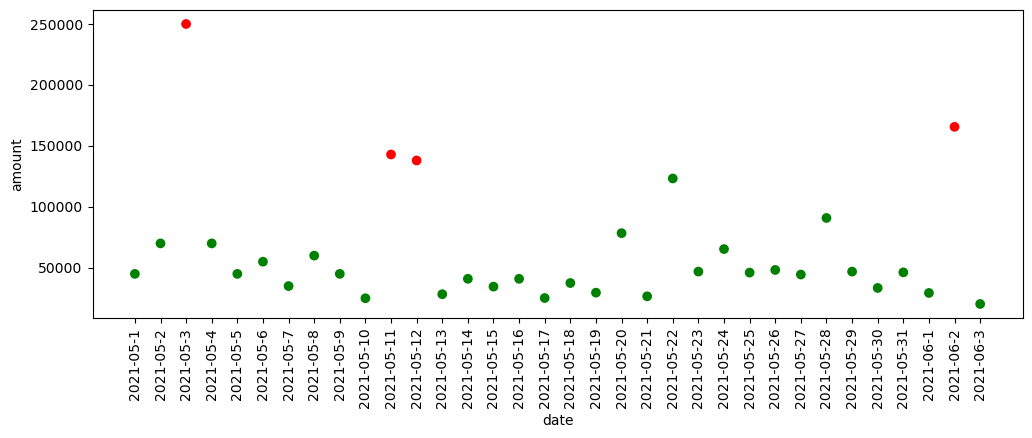

In [36]:
"""LOF """
lof_model = LOF()
lof_df = fit_model(lof_model, data)
plot_anomalies(lof_df)

In [37]:
anomaly_scores, threshold = get_anomaly_scores(lof_model)
print(f"Anomaly Scores: {anomaly_scores}, \nThreshold: {threshold}")

Anomaly Scores: [0.96943738 1.44663158 6.95138284 1.44663158 0.96943738 1.13613938
 0.98511861 1.19766155 0.96943738 1.02394401 3.68518031 3.53116118
 0.9835512  0.97372488 0.98379269 0.97372488 1.01856773 0.98716987
 0.98713539 1.72402355 0.99056951 3.06819412 0.98259654 1.30068672
 0.98039317 0.99370586 0.97097242 2.15395436 0.98257972 0.99829485
 0.98097905 0.98650339 4.33806271 1.16495666], 
Threshold: 3.3922710644189893


In [38]:
# Threshold computation
pd.Series(anomaly_scores).quantile(.90)

3.3922710644189893